<center><font size=5>Capstone Project  </font></center>

 <center><font size=6>German Traffic Sign Recognition</font></center>

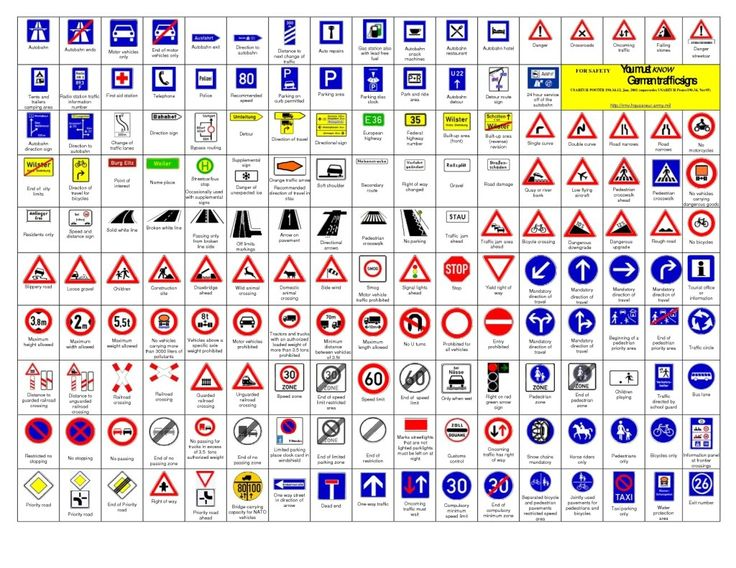

**Business problem** : How well a car can recognize a traffic sign ?

**Data problem** : What machine learning model could be used to recognize a traffic sign from a predefined list and the most accurate and fast as possible ?

Agenda :
    
**Part 1 : Exploratory data analysis**

* Load data
* Merge data
* Check the data

**Part 2 : Modelling**

* Load data
* General preprocessing
* Modelling (custom model and pretrained)
* Evaluation (accuracy)
* Choice of the best model

**Part 3 : Deployment**

* Save the best model
* Deploy it (html, css, app.py,...)


Dataset from Kaggle :
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Test.csv


# Part 1 : EDA

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams.update({'font.size': 10})

## Load data

### Training set

In [2]:
sign_data_train=pd.read_csv('Train.csv')
sign_data_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
print(sign_data_train.shape)

(39209, 8)


### Test set

In [4]:
sign_data_test=pd.read_csv('Test.csv')
sign_data_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [5]:
print(sign_data_test.shape)

(12630, 8)


### Merge the two datasets

In [6]:
sign_data=pd.concat([sign_data_train,sign_data_test])
sign_data.reset_index(inplace=True)
sign_data.drop('index',axis=1,inplace=True)
sign_data.sample(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
48713,44,85,6,7,39,78,38,Test/09504.png
32744,35,34,6,5,30,29,31,Train/31/00031_00022_00014.png
30993,42,39,6,6,37,34,28,Train/28/00028_00006_00003.png
11149,58,58,6,5,53,53,7,Train/7/00007_00014_00019.png
12665,33,31,5,5,28,26,8,Train/8/00008_00017_00005.png
37479,32,34,5,5,27,29,38,Train/38/00038_00049_00010.png
22595,38,35,5,5,32,30,13,Train/13/00013_00071_00005.png
38056,41,43,5,5,36,38,38,Train/38/00038_00068_00017.png
39169,42,41,6,5,37,36,42,Train/42/00042_00006_00020.png
48980,87,79,8,7,80,72,29,Test/09771.png


## Datatypes

In [7]:
sign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51839 entries, 0 to 51838
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    51839 non-null  int64 
 1   Height   51839 non-null  int64 
 2   Roi.X1   51839 non-null  int64 
 3   Roi.Y1   51839 non-null  int64 
 4   Roi.X2   51839 non-null  int64 
 5   Roi.Y2   51839 non-null  int64 
 6   ClassId  51839 non-null  int64 
 7   Path     51839 non-null  object
dtypes: int64(7), object(1)
memory usage: 3.2+ MB


Width : With of the image

Height : Height of the image

Roi.X1 : X coordinate for the bottom left point to of Region of interest

Roi.Y1 : Y coordinate for the bottom left of Region of interest

Roi.X2 : X coordinate for the top right point to of Region of interest

Roi.Y2 : Y coordinate for the top right point of Region of interest

ClassId : Class of the image

Path : Path of each image (2 different folders (Train and Test))

In [8]:
#Drop ROI columns
sign_data.drop(['Roi.X1','Roi.Y1','Roi.X2','Roi.Y2'],axis=1,inplace=True)

In [9]:
sign_data.describe()

,Width,Height,ClassId
count,51839.000000,51839.000000,51839.000000
mean,50.755937,50.337584,15.730570
std,24.499807,23.258706,11.997481
min,25.000000,25.000000,0.000000
25%,34.000000,35.000000,5.000000
50%,43.000000,43.000000,12.000000
75%,58.000000,58.000000,25.000000
max,266.000000,232.000000,42.000000


On average, the dimesions of the picture is 50x50 pixels

## Check for missing values

In [10]:
sign_data.isnull().sum()

Width      0
Height     0
ClassId    0
Path       0
dtype: int64

## Classes

In [11]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

len(classes)

43

There are 43 classes to identify

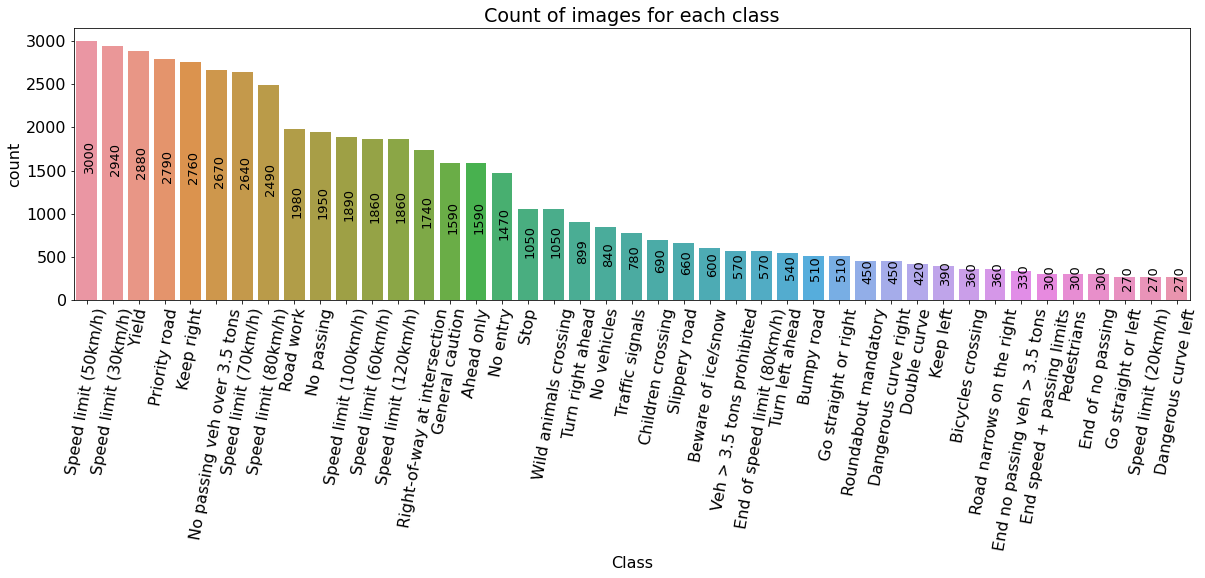

In [12]:
plt.rcParams['font.size'] = '16'
sign_data['Class']=[classes[x]for x in sign_data['ClassId']]
plt.figure(figsize=(20,5))
ax= sns.countplot(x=sign_data['Class'],order=sign_data['Class'].value_counts().index)
plt.xticks(rotation=80)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()/2),size=13,rotation=90)
    
plt.title('Count of images for each class')
plt.show()

## Check some data

### 1 image

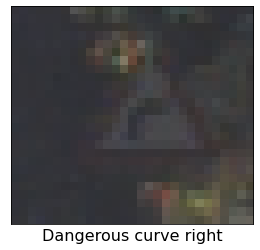

In [13]:
image=sign_data.iloc[2]
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(plt.imread(image['Path']))
plt.xlabel(image['Class'])
plt.show()

### 25 images

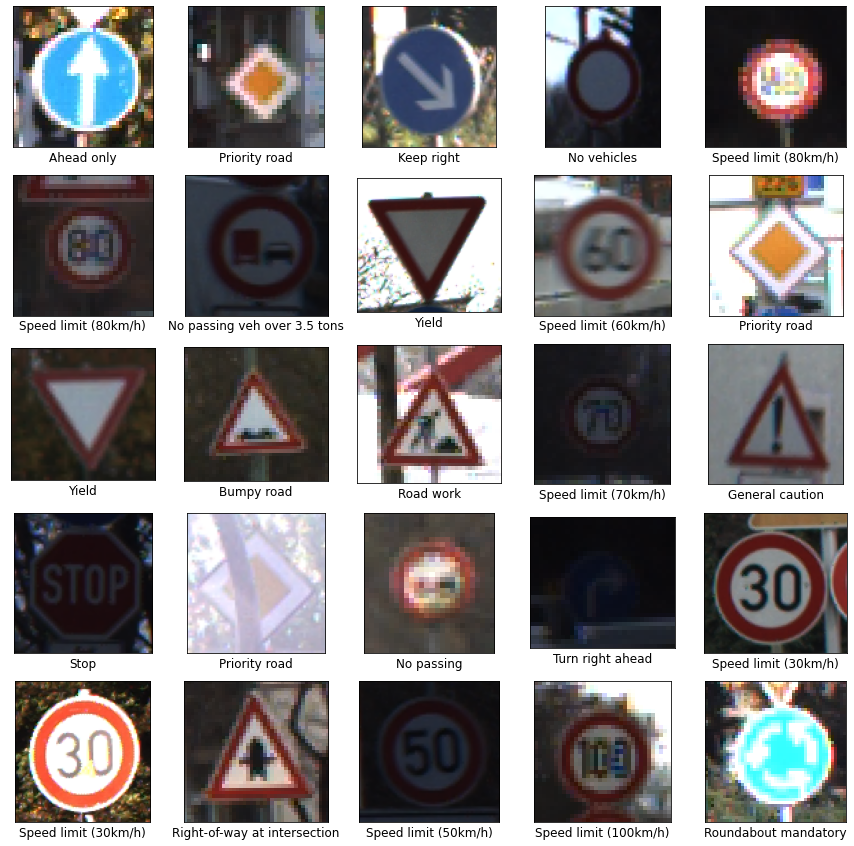

In [14]:
plt.figure(figsize=(15,15))
rndm_idx=np.random.randint(0,sign_data.shape[0],25)
for i,image_index in enumerate(rndm_idx):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(plt.imread(sign_data.loc[image_index,'Path']))
    plt.xlabel(classes[sign_data.loc[image_index,'ClassId']],size=12)
plt.show()

Different kind of images :
* low resolution
* blurry
* different luminosity
* sticker on the sign
* Some are even no readable by human
* some are partly hidden by something else

## Dimensions of images

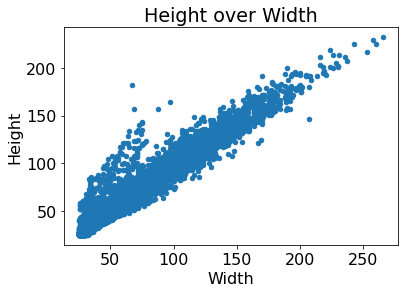

In [15]:
sign_data.plot('Width','Height',kind='scatter')
plt.title('Height over Width')
plt.show()

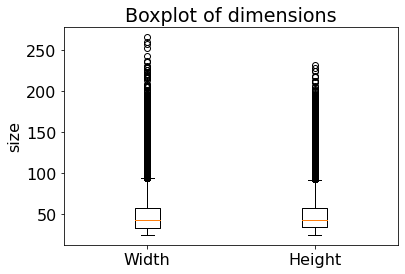

In [16]:
list_col=['Width','Height']
plt.boxplot(sign_data[list_col],labels=list_col)
plt.ylabel('size')
plt.title('Boxplot of dimensions')
plt.show()

In [17]:
sign_data.drop(['Width','Height'],axis=1,inplace=True)

## Save the Dataframe

In [18]:
sign_data.to_pickle('./full_df.pkl')

## Highlights of this EDA

- 50,000+ labeled images
- 43 classes
- Each class has at leat 270 images 
- On average, the dimension of an image is 50*50 pixels

**GO TO PART 2 : MODELLING**